In [ ]:
pip install keras==2.3.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.8/377.8 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 3.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully uninstalled keras-2.11.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.11.0 requires keras<2.12,>=2.11.0, but you have keras 2.3.1 which is incompatible.


In [ ]:
pip install tensorflow==2.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.6/454.6 KB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.0/26.0 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.9/152.9 KB 13.1 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Uninstalling tensorflow-estimator-2.11.0:
      Successfully uninstalled tensorflow-estimator-2.11.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
  Attempting uninstall: h5py
    Found existing installat

In [ ]:
pip install git+https://www.github.com/keras-team/keras-contrib.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-uzrhc9z_
  Running command git clone --filter=blob:none --quiet https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-uzrhc9z_
  Resolved https://www.github.com/keras-team/keras-contrib.git to commit 3fc5ef709e061416f4bc8a92ca3750c824b5d2b0
  Preparing metadata (setup.py) ... done
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-py3-none-any.whl size=101076 sha256=008320550e2895744e40ece27cc9cb4fca498df3bd5deff0d194e5eb9c32907c
  Stored in directory: /tmp/pip-ephem-wheel-cache-xh3t8qcx/wheels/67/d2/f4/96ae3c3c62d1e05abfc8860ad0c1207794726d44ebbbb547f3
Successfully built keras-contrib


In [ ]:
import tensorflow
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
print(keras.__version__)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from math import nan
from keras.callbacks import ModelCheckpoint

#!pip install git+https://www.github.com/keras-team/keras-contrib.git
import keras_contrib
from keras_contrib.layers import CRF

from subprocess import check_output

2.3.1


Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive/MyDrive/Colab Notebooks'

'annotated dataset full.csv'	        csvtojson.ipynb
'Bi-LSTM with CRF for NER.ipynb'        Ner_Bert1.ipynb
'Copy of Welcome to Colaboratory'      'NER using Random Forest and CRF.ipynb'
'Copy of Welcome to Colaboratory (1)'   Untitled0.ipynb


In [ ]:
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks")
dataset = pd.read_csv("annotated dataset full.csv", encoding = "utf-8")

In [ ]:
dataset=dataset.fillna(method='ffill')

In [ ]:
dataset.columns

Index(['Sentence #', 'Word', 'Tag'], dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650299 entries, 0 to 650298
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Sentence #  650299 non-null  object
 1   Word        650299 non-null  object
 2   Tag         650299 non-null  object
dtypes: object(3)
memory usage: 14.9+ MB


In [ ]:
dataset.head()

,Sentence #,Word,Tag
0,Sentence: 1,নিশাকর,B-PER
1,Sentence: 1,বলিতে,O
2,Sentence: 1,লাগিলেন,O
3,Sentence: 1,",",O
4,Sentence: 1,“,O


In [ ]:
class SentenceGetter(object):

    def __init__(self, dataset):
        self.n_sent = 1
        self.dataset = dataset
        self.empty = False
        agg_func = lambda s: [(w, t) for w,t in zip(s["Word"].values.tolist(),
                                                        s["Tag"].values.tolist())]
        self.grouped = self.dataset.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]

    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [ ]:
getter = SentenceGetter(dataset)

In [ ]:
sentences = getter.sentences

In [ ]:
print(sentences[0])

[('নিশাকর', 'B-PER'), ('বলিতে', 'O'), ('লাগিলেন', 'O'), (',', 'O'), ('“', 'O'), ('আপনার', 'O'), ('ভার্যা', 'O'), ('আমাকে', 'O'), ('বিষয়গুলি', 'O'), ('পত্তনি', 'O'), ('দিতে', 'O'), ('স্বীকৃত', 'O'), ('হইয়াছেন', 'O'), (',', 'O'), ('কিন্তু', 'O'), ('আপনার', 'O'), ('অনুমতিসাপেক্ষ', 'O')]


In [ ]:
maxlen = max([len(s) for s in sentences])
print ('Maximum sequence length:', maxlen)

Maximum sequence length: 75


In [ ]:
# Check how long sentences are so that we can pad them
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

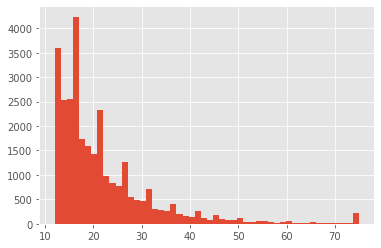

In [ ]:
plt.hist([len(s) for s in sentences], bins=50)
plt.show()

In [ ]:
words = list(set(dataset["Word"].values))
words.append("ENDPAD")

In [ ]:
n_words = len(words); n_words

64058

In [ ]:
tags = []
for tag in set(dataset["Tag"].values):
    if tag is nan or isinstance(tag, float):
        tags.append('unk')
    else:
        tags.append(tag)
print(tags)

['B-LOC', 'O', 'B-ORG', 'B-TIM', 'I-PER', 'I-TIM', 'I-LOC', 'I-ORG', 'B-PER']


In [ ]:
n_tags = len(tags); n_tags

9

In [ ]:
from future.utils import iteritems
word2idx = {w: i for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}
idx2tag = {v: k for k, v in iteritems(tag2idx)}

In [ ]:
word2idx['নিশাকর']

13103

In [ ]:
tag2idx["O"]

1

In [ ]:
tag2idx

{'B-LOC': 0,
 'O': 1,
 'B-ORG': 2,
 'B-TIM': 3,
 'I-PER': 4,
 'I-TIM': 5,
 'I-LOC': 6,
 'I-ORG': 7,
 'B-PER': 8}

In [ ]:
idx2tag[5]

'I-TIM'

In [ ]:
idx2tag

{0: 'B-LOC',
 1: 'O',
 2: 'B-ORG',
 3: 'B-TIM',
 4: 'I-PER',
 5: 'I-TIM',
 6: 'I-LOC',
 7: 'I-ORG',
 8: 'B-PER'}

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X = [[word2idx[w[0]] for w in s] for s in sentences]

In [ ]:
X = pad_sequences(maxlen=75, sequences=X, padding="post",value=n_words - 1)

In [ ]:
y_idx = [[tag2idx[w[1]] for w in s] for s in sentences]
print(sentences[100])
print(y_idx[100])

[('ঘরে', 'O'), ('এসে', 'O'), ('প্রবেশ', 'O'), ('করলেন', 'O'), ('বামদেব', 'B-PER'), ('ঐ', 'O'), ('সময়', 'O'), (',', 'O'), ('এই', 'O'), ('যে', 'O'), ('বিনয়', 'O'), (';', 'O'), ('কখন', 'O'), ('এলে', 'O'), ('?', 'O'), ('এই', 'O'), ('কিছুক্ষণ', 'O')]
[1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
y = pad_sequences(maxlen=75, sequences=y_idx, padding="post", value=tag2idx["O"])
print(y_idx[100])

[1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
from keras.utils import to_categorical
y = [to_categorical(i, num_classes=n_tags) for i in y]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [ ]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.0 MB/s eta 0:00:00


In [ ]:
from keras import Model,Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional,Lambda

import tensorflow as tf
from keras_contrib.layers import CRF


In [ ]:
max_len = 75
input = Input(shape=(max_len,))
#model = Lambda(lambda X: tf.round(X))(model)
model = Embedding(input_dim=n_words, output_dim=150, input_length=max_len)(input)
model = Bidirectional(LSTM(units=150,
                           return_sequences=True,
                           dropout=0.5,
                           recurrent_dropout=0.5,
                           ))(model)
model = LSTM(units=300,
             return_sequences=True,
             dropout=0.5,
             recurrent_dropout=0.5,
             )(model)

model = TimeDistributed(Dense(n_tags, activation="relu"))(model)  # previously softmax output layer

crf = CRF(n_tags)  # CRF layer
out = crf(model)  # output

In [ ]:
model = Model(input, out)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 75)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 75, 150)           9608700   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 75, 300)           361200    
_________________________________________________________________
lstm_2 (LSTM)                (None, 75, 300)           721200    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 75, 9)             2709      
_________________________________________________________________
crf_1 (CRF)                  (None, 75, 9)             189       
Total params: 10,693,998
Trainable params: 10,693,998
Non-trainable params: 0
_______________________________________________

In [ ]:
from keras_contrib import losses
from keras_contrib import metrics
import tensorflow as tf
adam = tf.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999)
#model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.compile(optimizer=adam, loss=losses.crf_loss, metrics=[metrics.crf_accuracy])

In [ ]:
from tensorflow.keras.callbacks import  EarlyStopping
# Saving the best only
import numpy as np
early_stopping = EarlyStopping(monitor='val_accuracy', patience=1, verbose=1, mode='max', restore_best_weights=False)
callbacks = [early_stopping]

In [ ]:
history = model.fit(X_train, np.array(y_train), batch_size=32, epochs=3, validation_split=.2, verbose=1, callbacks=callbacks)

Train on 21334 samples, validate on 5334 samples
Epoch 1/3
21334/21334 [==============================] - 966s 45ms/step - loss: 0.1183 - crf_accuracy: 0.9722 - val_loss: 0.0620 - val_crf_accuracy: 0.9807


Epoch 2/3
21334/21334 [==============================] - 937s 44ms/step - loss: 0.0425 - crf_accuracy: 0.9847 - val_loss: 0.0365 - val_crf_accuracy: 0.9879


Epoch 3/3
21334/21334 [==============================] - 937s 44ms/step - loss: 0.0217 - crf_accuracy: 0.9913 - val_loss: 0.0277 - val_crf_accuracy: 0.9887


In [ ]:
model.metrics_names

['loss', 'crf_accuracy']

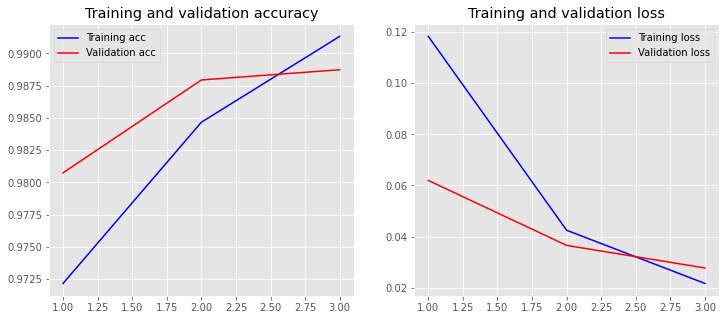

In [ ]:
# Plot the graph
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    accuracy = history.history['crf_accuracy']
    val_accuracy = history.history['val_crf_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(accuracy) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, accuracy, 'b', label='Training acc')
    plt.plot(x, val_accuracy, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history)


In [ ]:
def pred2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            p_i = np.argmax(p)
            out_i.append(idx2tag[p_i])
        out.append(out_i)
    return out
test_pred = model.predict(X_test, verbose=1)
pred_labels = pred2label(test_pred)
test_labels = pred2label(y_test)

2964/2964 [==============================] - 25s 8ms/step


In [ ]:
test_pred.shape

(2964, 75, 9)

In [ ]:
np.argmax(test_pred,axis=2)[1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(np.argmax(y_test, 2).ravel(), np.argmax(test_pred, axis=2).ravel(),labels=list(idx2tag.keys()), target_names=list(idx2tag.values())))

              precision    recall  f1-score   support

       B-LOC       0.00      0.00      0.00       258
           O       1.00      1.00      1.00    218251
       B-ORG       0.00      0.00      0.00        37
       B-TIM       0.62      0.65      0.63       645
       I-PER       0.53      0.47      0.50       278
       I-TIM       0.49      0.49      0.49       303
       I-LOC       0.00      0.00      0.00        62
       I-ORG       0.00      0.00      0.00        43
       B-PER       0.66      0.79      0.72      2423

    accuracy                           0.99    222300
   macro avg       0.37      0.38      0.37    222300
weighted avg       0.99      0.99      0.99    222300



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
pip install seqeval

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16179 sha256=1970bbcbb07fcd16d93f96c46c21a8f2ad4f85e35dd91ab6aa2bcbe492e61376
  Stored in directory: /root/.cache/pip/wheels/ad/5c/ba/05fa33fa5855777b7d686e843ec07452f22a66a138e290e732
Successfully built seqeval


In [ ]:
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report
print("F1-score: {:.1%}".format(f1_score(pred_labels, test_labels)))
print("Precision-score: {:.1%}".format(precision_score(pred_labels, test_labels)))
print("Recall-score: {:.1%}".format(recall_score(pred_labels, test_labels)))

F1-score: 60.9%
Precision-score: 64.0%
Recall-score: 58.0%
